In [18]:

# Step 1: Import necessary librariesimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [17]:
# Step 2: Load dataset
# Note: Use raw string or double backslashes for Windows paths
df = pd.read_csv(r"C:\datasets\diabetes.csv")

# Preview dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Step 3: Replace zeroes in columns where 0 is invalid
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

# Check for missing values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# Step 4: Feature scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop("Outcome", axis=1)), columns=df.columns[:-1])
y = df["Outcome"]



In [21]:
# Step 5: Stratified train-test split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Check class distribution
y.value_counts(normalize=True)


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [23]:
# Step 6: Hyperparameter tuning
params = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [24]:
# Step 7: Evaluation
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       150
           1       0.63      0.47      0.54        81

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

Accuracy Score: 0.7186147186147186


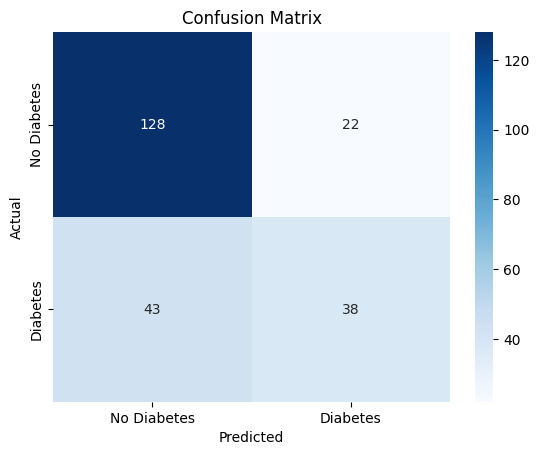

In [25]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



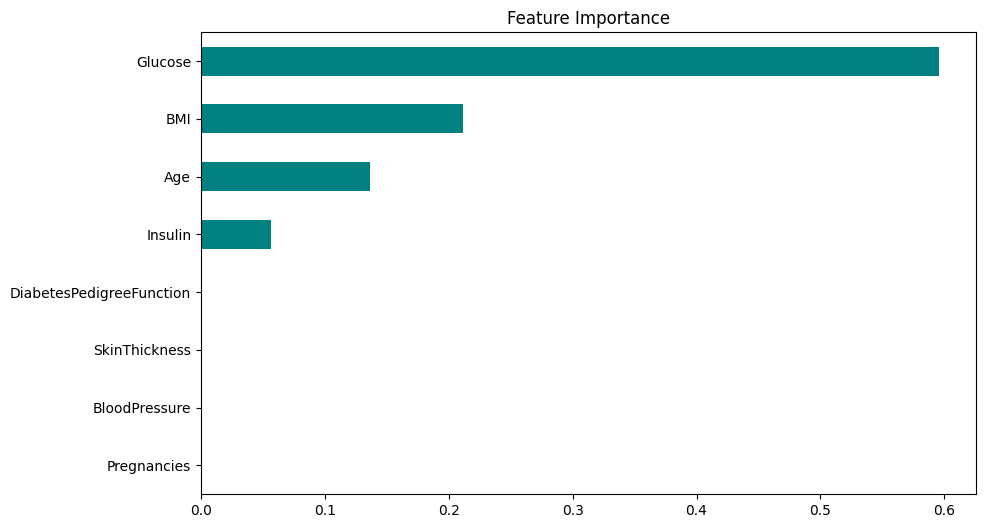

In [26]:
# Step 9: Feature Importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.show()


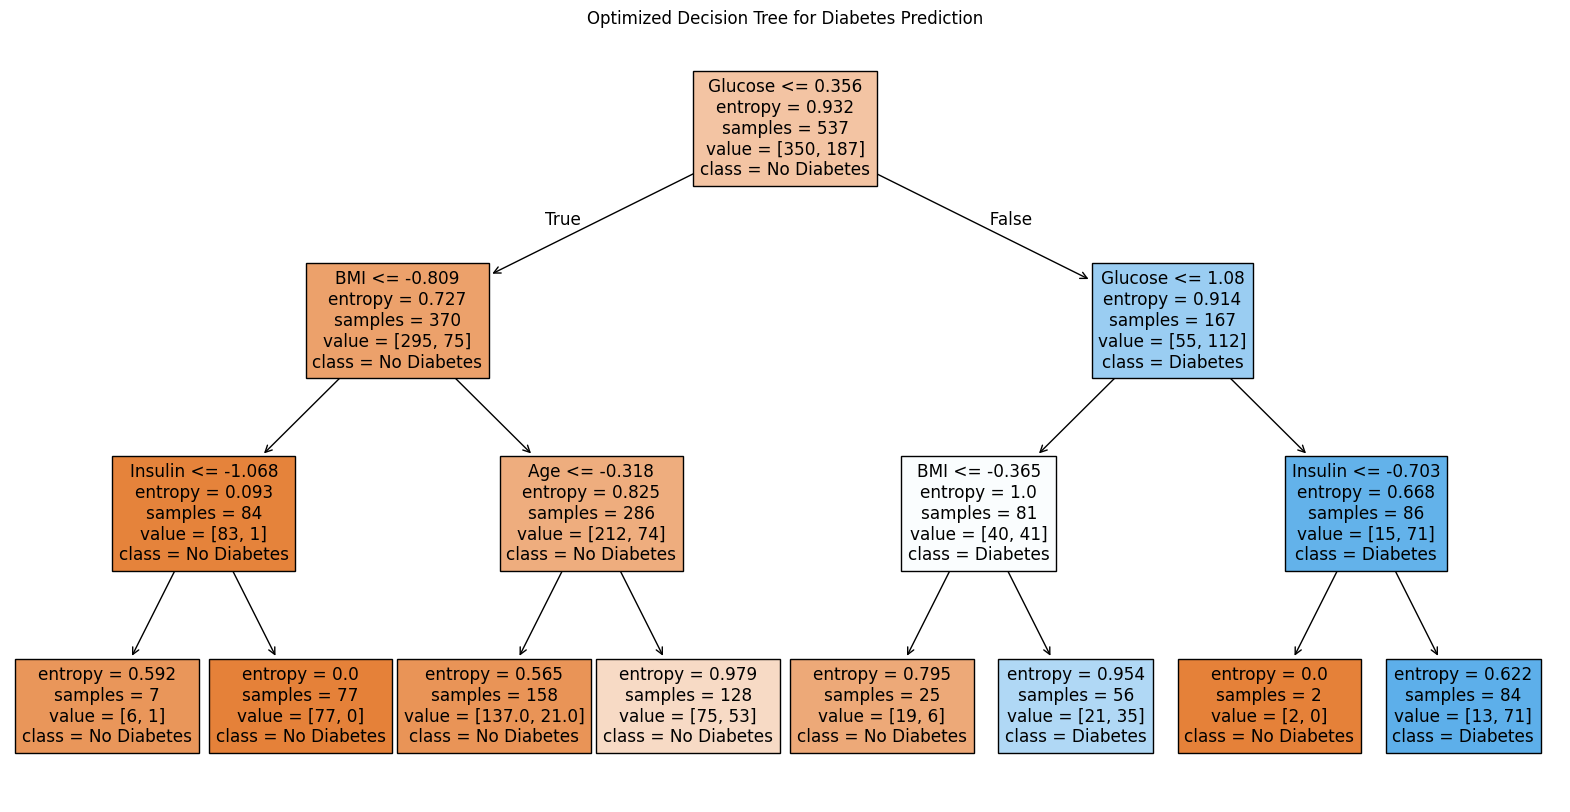

In [27]:
# Step 10: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns,
          class_names=["No Diabetes", "Diabetes"],
          filled=True)
plt.title("Optimized Decision Tree for Diabetes Prediction")
plt.show()
